# Yamamoto et al. (1990) :  Axial-Rotation and Bending
- Performed by: 
- Reviewed by:
- Last modified : 
- SAFER HBM Version:  
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-10.0-1?style=flat&logoColor=blue&labelColor=whitw&color=green)
    - ![Static Badge](https://img.shields.io/badge/SAFER_HBM-11.0-1?style=flat&logoColor=blue&labelColor=whitw&color=blue)
- LSDYNA version:  `mpp d R12.2.1 `


## Experiment by Yamamoto et al. (1990)

The simulated outputs are compared to the references from PMHS tests reported by Yamamoto et al.  <sup>[1]</sup>
1.	Yamamoto I, Panjabi MM, Crisco T, Oxland T. Three-dimensional movements of the whole lumbar spine and lumbosacral joint. Spine. 1989;14(11):1256-60.

![](_env/setup.png)
## Summary of the experiment

- `Coordinate system `    : aligned with Global in simulations
- `Load case`    :  Axial rotation, flexion, extension and lateral bending for the complete lumbar spine.
- 10 fresh lumbar spines from PMHSs aged between 25 and 63 years, but of unknown sex, stature and weight.

### Loading and Boundary Conditions
- The specimens were loaded in six pure moment cases, flexion, extension, left-right axial rotation and left-right lateral bending.
- At the superior end L1 vertebrae were constrained in epoxy.
- At the inferior end, the sacral vertebrae and pelvis were constrained in epoxy which is rigidly attached to the test table.
- The potting constrain was implimented in LS-DYNA using  `*CONSTRAINT_SHELL_IN_SOLID_PENALTY`. 
- Pure moment loads in steps of 2.5 Nm up to 10 Nm, were applied to the superior potting in the test. This was implimented by applying a very low rotation displacement to the superior potting using `*BOUNDARY_PRESCRIBED_MOTION_RIGID`.
- To achieve pure moments the superior potting was free in all DOFs.

#### Assumptions
- Based on the figures in the litrature [1] it was estimated that the spine was in a neutral (or lordotic) position.
- So, the “LUMB_FLEX” parameter in the SHBM lumbar spine was set to `-1`

#### Modelling in dyna
##### submodel preparation
- Vertebrae level from L1 to Pelvis is extracted from the model.
- The bony, ligamentous and cartilaginous structures of the specimens were retained for testing.
- **Illio lumbar ligaments were removed**
- All the muscles elements are removed. 

##### Potting
- Both ends of each specimen were potted with using epoxy block.
- This was modeeled using `MAT_ELASTIC` potting material with $E=2Gpa$ and the based modelled with `MAT_RIGID` to prescribe the loads and constraints.
- The potting did not impede the motion at the discs of the corresponding potted levels.
- The superior surface of L4 was maintained horizontal while potting.

### Responses recorded
- The rotational displacement at each vertebral level is recorded.
- Reaction moments in the upper potting was recorded.
- The reference values from the paper were digitalised [2]  and are incuded in the notebook. The data corresponds to the unnormalised corridors.

### Other references
2.	Drevon D, Fursa SR, Malcolm AL. Intercoder reliability and validity of WebPlotDigitizer in extracting graphed data. Behavior modification. 2017;41(2):323-39. 
3.	Iraeus J, Poojary YN, Jaber L, John J, Davidsson J.[ A new open-source finite element lumbar spine model, its tuning and validation, and development of a tissue-based injury risk function for compression fractures](http://www.ircobi.org/wordpress/downloads/irc23/pdf-files/23132.pdf). Nucleus. 2023;3:4.


In [1]:
import os
import glob
# for data analysis
import pandas as pd
import numpy as np
import math as mt
# packages for plotting
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Plot formats
sns.set()
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1)
s10 = {"linestyle" :'-', "color" : 'g',"alpha" :1,"linewidth":2}
s11 = {"linestyle" :'-', "color" : 'b',"alpha" :1,"linewidth":2}
pmhs_marked = {"linestyle" :'--', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 1}
pmhsM = {"linestyle" :'--', "color" : 'b',"alpha" :0.7,"linewidth":1}
pmhsF = {"linestyle" :'--', "color" : 'r',"alpha" : 0.7,"linewidth":1}
Test_avg = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75}
test_corr = {"color": 'silver',"alpha" : 0.7,'linewidth':0.0}
Test_avg_norm = {"linestyle" :'-', "color" : 'k',"alpha" :1,"linewidth":1, 'marker' :"o", 'markevery': 75,'mfc': 'seagreen','mec': 'seagreen'}

# Dataframe formats
def select_col(x):
    mask = x['Overall Score'] <0.5
    df1 =  pd.DataFrame('', index=x.index, columns=x.columns)
    df1.loc[mask,'Overall Score'] = 'color:crimson;font-weight:bold;'
    return df1
heading = [dict(selector="caption",
            props=[("text-align", "center"),
                   ("font-size", "150%"),
                   ("font-weight", "bold")])]
content={'text-align': 'center'}

In [7]:

Tests=['flexion','extension','lateral_bending','axial_rotation']
experiment_dir= "data/experiment_data/"
df_v10={}
df_v11={}
exp={}
for test in Tests:
    # Import processed data
    df_v10[test]=pd.read_csv(os.path.join(os.path.join("data/processed/SAFER10.0",test),"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])
    df_v11[test]=pd.read_csv(os.path.join(os.path.join("data/processed/SAFER11.0",test),"Dynasaur_output.csv"), delimiter=';', na_values='-', header = [0,1,2,3])

# Import experimental data
exp_L12=pd.read_csv(os.path.join(experiment_dir,'L12.csv'),delimiter=';',header=[0])
exp_L23=pd.read_csv(os.path.join(experiment_dir,'L23.csv'),delimiter=';',header=[0])
exp_L34=pd.read_csv(os.path.join(experiment_dir,'L34.csv'),delimiter=';',header=[0])
exp_L45=pd.read_csv(os.path.join(experiment_dir,'L45.csv'),delimiter=';',header=[0])
exp_L5S1=pd.read_csv(os.path.join(experiment_dir,'L5S1.csv'),delimiter=';',header=[0])

exp['L12']=pd.read_csv(os.path.join(experiment_dir,'L12.csv'),delimiter=';',header=[0])
exp['L23']=pd.read_csv(os.path.join(experiment_dir,'L23.csv'),delimiter=';',header=[0])
exp['L34']=pd.read_csv(os.path.join(experiment_dir,'L34.csv'),delimiter=';',header=[0])
exp['L45']=pd.read_csv(os.path.join(experiment_dir,'L45.csv'),delimiter=';',header=[0])
exp['L5S1']=pd.read_csv(os.path.join(experiment_dir,'L5S1.csv'),delimiter=';',header=[0])

## Response Plots
### Full spine response

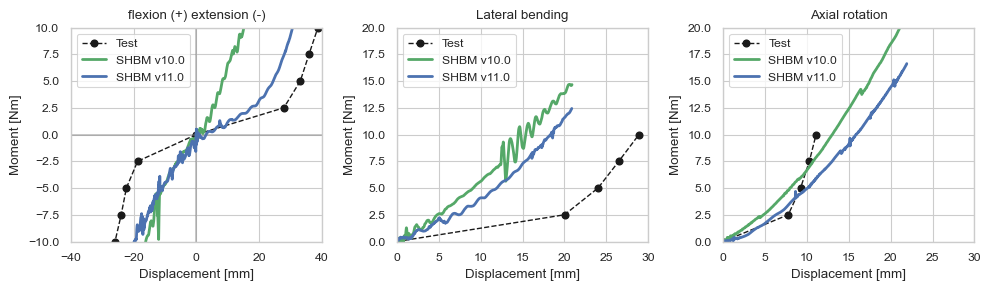

In [20]:
fig_L12, ax = plt.subplots(nrows=1, ncols=3,figsize=(10, 3))
# --------------------------------------------------------------F-E--------------------------------------------------------------
ax[0].plot(exp_L12.Fx+exp_L23.Fx+exp_L34.Fx+exp_L45.Fx+exp_L5S1.Fx,exp_L12.Fy,**pmhs_marked,label='Test')
ax[0].plot(exp_L12.Ex+exp_L23.Ex+exp_L34.Ex+exp_L45.Ex+exp_L5S1.Ex,-exp_L12.Ey,**pmhs_marked)
ax[0].set(xlim=[-40,40],ylim=[-10,10],xlabel='Displacement [mm]',title='flexion (+) extension (-)',ylabel='Moment [Nm]');
ax[0].axhline(y=0, color='gray',alpha=0.5)
ax[0].axvline(x=0, color='gray',alpha=0.5)
ax[0].plot(np.degrees(pd.DataFrame(df_v10['flexion'].loadcell.RotationY.Rotation)),
           pd.DataFrame(df_v10['flexion'].loadcell.Momenty.moment),**s10,label='SHBM v10.0')
ax[0].plot(-np.degrees(pd.DataFrame(df_v10['extension'].loadcell.RotationY.Rotation)),
           -pd.DataFrame(df_v10['extension'].loadcell.Momenty.moment),**s10)

ax[0].plot(np.degrees(pd.DataFrame(df_v11['flexion'].loadcell.RotationY.Rotation)),
           pd.DataFrame(df_v11['flexion'].loadcell.Momenty.moment)+0.5,**s11,label='SHBM v11.0')
ax[0].plot(np.degrees(pd.DataFrame(df_v11['extension'].loadcell.RotationY.Rotation.iloc[0:600])),
           pd.DataFrame(df_v11['extension'].loadcell.Momenty.moment.iloc[0:600])+0.5,**s11)

# # --------------------------------------------------------------Lateral bending--------------------------------------------------------------

ax[1].plot(exp_L12.Lbx+exp_L23.Lbx+exp_L34.Lbx+exp_L45.Lbx+exp_L5S1.Lbx,exp_L12.Lby,**pmhs_marked,label='Test')
ax[1].set(xlim=[0,30],ylim=[0,20],xlabel='Displacement [mm]',title='Lateral bending',ylabel='Moment [Nm]');
ax[1].plot(np.degrees(pd.DataFrame(df_v10['lateral_bending'].loadcell.RotationX.Rotation).iloc[0:70000]),
           pd.DataFrame(df_v10['lateral_bending'].loadcell.Momentx.moment).iloc[0:70000],**s10,label='SHBM v10.0')

ax[1].plot(-np.degrees(pd.DataFrame(df_v11['lateral_bending'].loadcell.RotationX.Rotation.iloc[0:700])),
           -pd.DataFrame(df_v11['lateral_bending'].loadcell.Momentx.moment.iloc[0:700]),**s11,label='SHBM v11.0')


# # --------------------------------------------------------------Axial Rotation--------------------------------------------------------------

ax[2].plot(exp_L12.Arx+exp_L23.Arx+exp_L34.Arx+exp_L45.Arx+exp_L5S1.Arx,exp_L12.Ary,**pmhs_marked,label='Test')
ax[2].set(xlim=[0,30],ylim=[0,20],xlabel='Displacement [mm]',title='Axial rotation',ylabel='Moment [Nm]');
ax[2].plot(np.degrees(pd.DataFrame(df_v10['axial_rotation'].loadcell.RotationZ.Rotation))
           ,pd.DataFrame(df_v10['axial_rotation'].loadcell.Momentz.moment),**s10,label='SHBM v10.0')

ax[2].plot(-np.degrees(pd.DataFrame(df_v11['axial_rotation'].loadcell.RotationZ.Rotation))
           ,-pd.DataFrame(df_v11['axial_rotation'].loadcell.Momentz.moment),**s11,label='SHBM v11.0')

for l in range (3):
    ax[l].legend()
fig_L12.tight_layout()

In [14]:
def plot_FSU_stiffness(FSU,unit1,unit2):
    fig_FSU, ax = plt.subplots(nrows=1, ncols=3,figsize=(10, 3))

    ax[0].plot(exp['{}'.format(FSU)].Fx,exp['{}'.format(FSU)].Fy,**pmhs_marked,label='Test')
    ax[0].plot(exp['{}'.format(FSU)].Ex,-exp['{}'.format(FSU)].Ey,**pmhs_marked)

    ax[0].plot(np.degrees(pd.DataFrame(df_v10['flexion'].Spine['{}y'.format(unit1)].angle-df_v10['flexion'].Spine['{}y'.format(unit2)].angle)),
            pd.DataFrame(df_v10['flexion'].loadcell.Momenty.moment),**s10,label='SHBM V10.0')
    ax[0].plot(-np.degrees(pd.DataFrame(df_v10['extension'].Spine['{}y'.format(unit1)].angle-df_v10['extension'].Spine['{}y'.format(unit2)].angle)),
            -pd.DataFrame(df_v10['extension'].loadcell.Momenty.moment),**s10)

    ax[0].plot(np.degrees(pd.DataFrame(df_v11['flexion'].Spine['{}y'.format(unit1)].angle-df_v11['flexion'].Spine['{}y'.format(unit2)].angle)),
            pd.DataFrame(df_v11['flexion'].loadcell.Momenty.moment)+0.5,**s11,label='SHBM V11.0')
    ax[0].plot(np.degrees(pd.DataFrame(df_v11['extension'].Spine['{}y'.format(unit1)].angle.iloc[0:600]-df_v11['extension'].Spine['{}y'.format(unit2)].angle.iloc[0:600])),
            pd.DataFrame(df_v11['extension'].loadcell.Momenty.moment.iloc[0:600])+0.5,**s11)

    ax[0].set(xlim=[-10,10],ylim=[-10,10],xlabel='Rotation [deg]',title='flexion (+) extension (-)',ylabel='Moment [Nm]');
    ax[0].axhline(y=0, color='gray',alpha=0.5)
    ax[0].axvline(x=0, color='gray',alpha=0.5)

    ax[1].plot(exp['{}'.format(FSU)].Lbx,exp['{}'.format(FSU)].Lby,**pmhs_marked,label='Test')
    ax[1].plot(np.degrees(pd.DataFrame(df_v10['lateral_bending'].Spine['{}x'.format(unit1)].angle.iloc[0:70000]-df_v10['lateral_bending'].Spine['{}x'.format(unit2)].angle.iloc[0:70000])),
            pd.DataFrame(df_v10['lateral_bending'].loadcell.Momentx.moment.iloc[0:70000]),**s10,label='SHBM V10.0')

    ax[1].plot(-np.degrees(pd.DataFrame(df_v11['lateral_bending'].Spine['{}x'.format(unit1)].angle.iloc[0:700]-df_v11['lateral_bending'].Spine['{}x'.format(unit2)].angle.iloc[0:700])),
            -pd.DataFrame(df_v11['lateral_bending'].loadcell.Momentx.moment.iloc[0:700]),**s11,label='SHBM V11.0')
    ax[1].set(xlim=[0,10],ylim=[0,20],xlabel='Rotation [deg]',title='Lateral bending',ylabel='Moment [Nm]');

    ax[2].plot(exp['{}'.format(FSU)].Arx,exp['{}'.format(FSU)].Ary,**pmhs_marked,label='Test')
    ax[2].plot(np.degrees(pd.DataFrame(df_v10['axial_rotation'].Spine['{}z'.format(unit1)].angle-df_v10['axial_rotation'].Spine['{}z'.format(unit2)].angle)),
            pd.DataFrame(df_v10['axial_rotation'].loadcell.Momentz.moment),**s10,label='SHBM V10.0')

    ax[2].plot(-np.degrees(pd.DataFrame(df_v11['axial_rotation'].Spine['{}z'.format(unit1)].angle-df_v11['axial_rotation'].Spine['{}z'.format(unit2)].angle)),
            -pd.DataFrame(df_v11['axial_rotation'].loadcell.Momentz.moment),**s11,label='SHBM V11.0')
    ax[2].set(xlim=[0,10],ylim=[0,20],xlabel='Rotation [deg]',title='Axial rotation',ylabel='Moment [Nm]');

    for l in range (3):
        ax[l].legend()
    fig_FSU.tight_layout()

#### Functional spine units response
##### L1-L2

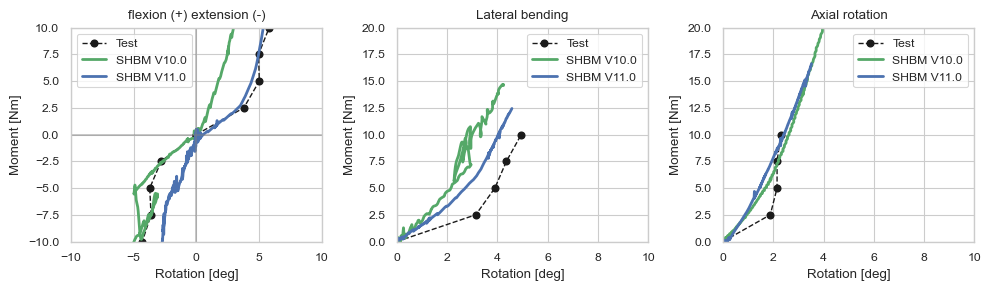

In [15]:
plot_FSU_stiffness('L12','L1','L2')

##### L2-L3

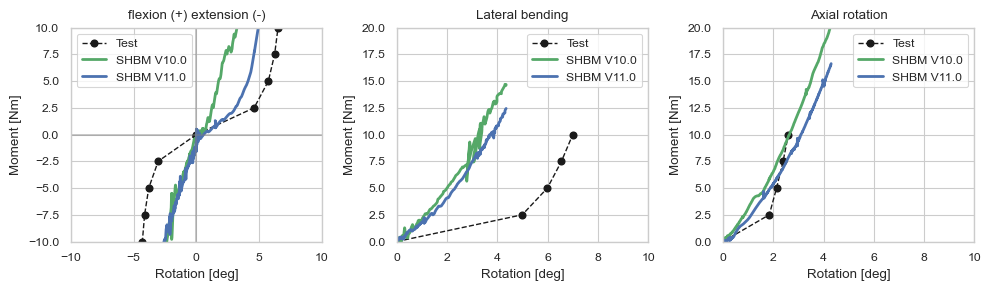

In [16]:
plot_FSU_stiffness('L23','L2','L3')

##### L3-L4

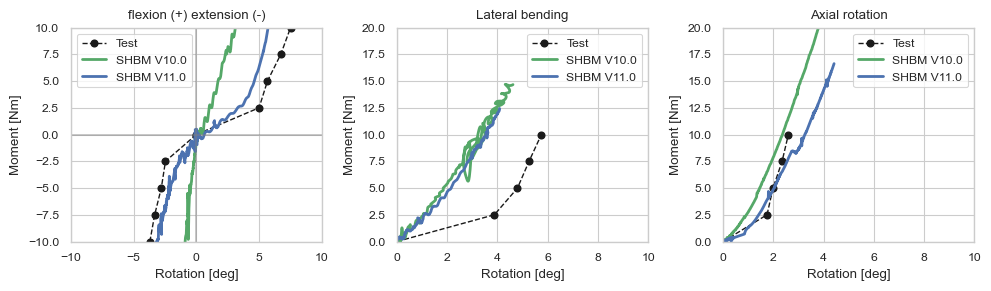

In [17]:
plot_FSU_stiffness('L34','L3','L4')

##### L4-L5

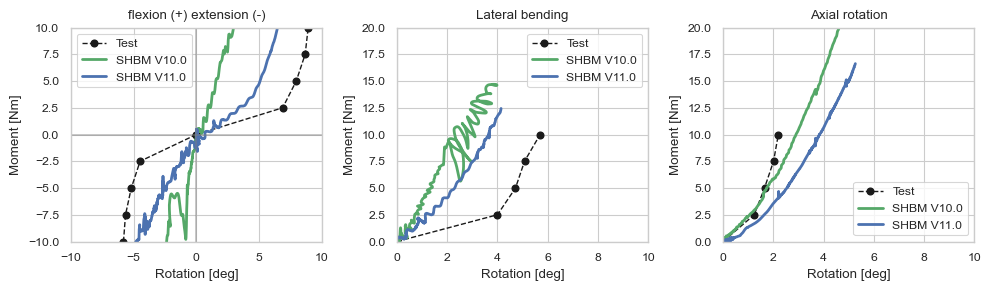

In [18]:
plot_FSU_stiffness('L45','L4','L5')

##### L5-S1

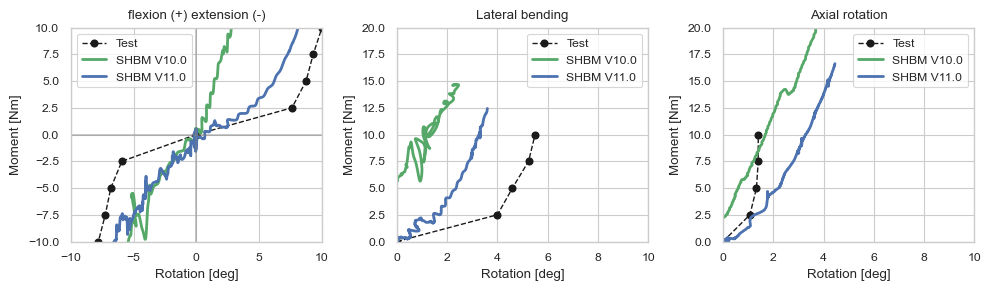

In [19]:
plot_FSU_stiffness('L5S1','L5','S1')